## Task 1 MLP Part 1 - Word2Vec Approach

In [3]:
import pandas as pd
import numpy as np

# Function to load the training and test datasets
# Returns data in the format x_train, y_train, x_test, y_test
def load_dataset():
    train_df = pd.read_csv('traindrug.csv')
    test_df = pd.read_csv('testdrug.csv')

    x_train = train_df.values[:, 0]
    y_train = train_df.values[:, 1].astype(np.int32)

    x_test = test_df.values[:, 0]
    y_test = test_df.values[:, 1].astype(np.int32)

    return x_train, y_train, x_test, y_test

In [4]:
x_train, y_train, x_test, y_test = load_dataset()

# Confirming expected data sizes
print("Length: x_train:", len(x_train))
print("Length: y_train:", len(y_train))
print("Length: x_test:", len(x_test))
print("Length: y_test:", len(y_test))

assert len(x_train) == 1000
assert len(y_train) == 1000
assert len(x_test) == 500
assert len(y_test) == 500

Length: x_train: 1000
Length: y_train: 1000
Length: x_test: 500
Length: y_test: 500


In [5]:
# Imports for converting data to embedded vectors
import re
from gensim.models import KeyedVectors

# Convert to vector
# Load the word vectors
filevec = 'GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(filevec, binary=True, limit=50000)
word2vec_vectors = word2vec

def text2Vec(list):
    vectors = []
    for row in list:
        tokens = [w.lower() for w in re.sub(r'[^\w\s]','',row).split(' ')]
        temp = []
        for token in tokens:
            if token in word2vec_vectors:
                temp.append(word2vec[token])
        vectors.append(np.mean(temp, axis=0))
    return np.asarray(vectors)

# Convert x_train and x_test to embedded vectors
x_train_vector = text2Vec(x_train)
x_test_vector = text2Vec(x_test)     

# Print the shape should correspond to a 300 vector array of length of x_...
print(x_train_vector.shape)
print(x_test_vector.shape)


(1000, 300)
(500, 300)


16/16 [==============================] - 0s 640us/step - loss: 0.2925 - accuracy: 0.5540
Final accuracy on test: 0.5540000200271606
Final loss on test:  0.29248955845832825


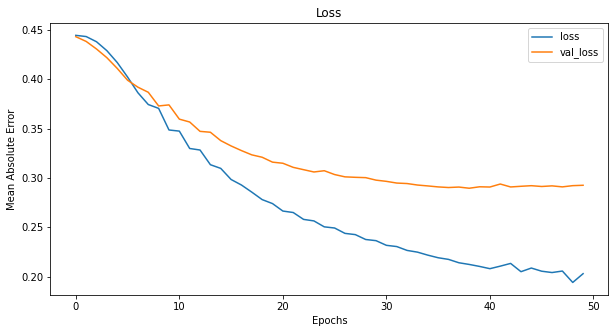

In [7]:
# Keras and tf imports
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define a model
# Using softmax as the problem is multiclass and softmax should porvide a probability distribution
mlp_model = Sequential()
mlp_model.add(Dense(50, input_dim = 300, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp_model.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros'))

opt = Adam(learning_rate=0.04)

mlp_model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['accuracy'])

# As the output is softmax the label must be encoded to a 1x3 matrix
# Subtract 1 for the labels to get them as an array starting from class 0
y_train_cat = to_categorical(y_train - 1)
y_test_cat = to_categorical(y_test - 1)

# Run the model against the computed vectors
epochs = 50
history = mlp_model.fit(x_train_vector, y_train_cat, epochs=epochs, batch_size=x_train_vector.shape[0], verbose=0, validation_data=(x_test_vector, y_test_cat))

final_loss, final_acc = mlp_model.evaluate(x_test_vector, y_test_cat)
print("Final accuracy on test: {}".format(final_acc))
print('Final loss on test: ', final_loss)

# Evaluation of softmax approach
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

plt.show()
